In [1]:
import scipy.io as scio  # 用于加载mat文件的包
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model,model_selection,svm


In [2]:
data = scio.loadmat('data3.mat')

X = data['X']
y = data['y']
# X= data['Xval']
# y = data['yval']

# print(X)
# print(y)

In [3]:
# 划分数据集
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

# print(X_train)
# print(y_train)


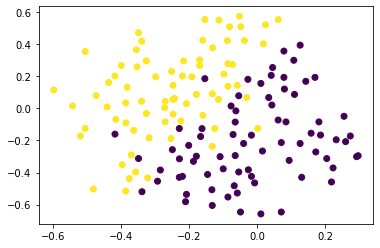

In [4]:
# 对训练数据进行可视化
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [5]:
# # 训练集合中，大部分数据肉眼可见是线性可分的，但也存在一些不可分数据，于是使用加松弛变量的方式来训练更好。
# model = svm.LinearSVC(C=0.8)
# model.fit(X_train,y_train.ravel())

# print('w：%s，b：%s'%(model.coef_,model.intercept_))

# print('算法评分：%.2f'%model.score(X_test,y_test))

# LinearSVC训练最好也是0.91，感觉不行。那就映射到高维再说。让他线性可分。
svc = svm.SVC(kernel='rbf', gamma=100.0,C=0.5)# 0.97
# 其他核函数好像都不怎么好啊。


svc.fit(X_train,y_train.ravel())


print('算法评分：%.2f'%svc.score(X_test,y_test))

# print(svc.get_params())

算法评分：0.97


In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#D8BFD8','#00FF00','#6495ED'])   # 这里更换划分的颜色。分别是一类颜色，边界颜色，二类颜色
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\develope\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


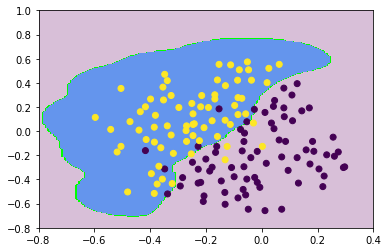

In [7]:
# 训练集合上的决策边界

plot_decision_boundary(svc, axis=[-0.8, 0.4, -0.8, 1])

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

D:\develope\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


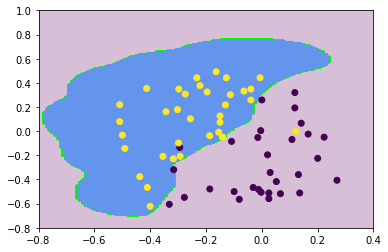

In [8]:
# 测试集合上的决策边界

plot_decision_boundary(svc, axis=[-0.8, 0.4, -0.8, 1])

plt.scatter(X_test[:,0],X_test[:,1],c=y_test)